### Assignment 1

Submission should be in a Jupyter note book (.ipynb)

1. Implement a function that converts a ```fixed<w, b>``` representation to a real number. Use two's compement for negative numbers. The function signature is 

   ```python
   def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
   # w: width of the binary representation
   # b: binary point
   ```
   Test the following inputs
   ```python
   fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
   ```
   ```python
   fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
   ```
   ```python
   fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])
   ```
   


In [11]:
def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
    x = -bits[0]*2**(w-b-1)
    for i in range(1,w):
        x += bits[i]*2**(w-b-i-1)
    return x

print(fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]))
print(fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1]))
print(fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1]))

44.75
-13.28125
-21.25


2. Calculate the price of the following questions step by step using two step Cox Rox Rubinstein (CRR) Binomial tree

    a. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 20%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3%$, $T=1$, $\sigma = 10%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)?
    

In [12]:
import time
from enum import Enum
import math
import matplotlib.pyplot as plt
import numpy as np

In [13]:
class PayoffType(str, Enum):
    Call = 'Call'
    Put = 'Put'
def twoStepCRRBinomial(S, r, vol, optType, K, T):
    t=T/2
    b = math.exp(vol * vol * t+r*t) + math.exp(-r * t)
    u = (b + math.sqrt(b*b - 4)) / 2
    d = 1/u
    p = (math.exp(r * t) - d) / (u-d)
    if optType == PayoffType.Call:
        return math.exp(-r * T) * (p *p * max(S * u* u - K, 0) +2*(1-p)*p*max(S* u* d - K, 0)+(1-p) *(1-p) * max(S * d* d - K, 0))
    elif optType == PayoffType.Put:
        return math.exp(-r * T) * (p *p * max(K - S * u* u, 0) +2*(1-p)*p*max(K - S* u* d, 0)+(1-p) *(1-p) * max(K - S * d* d, 0))

S,r,vol,optType,K,T = 100, 0.03, 0.2, PayoffType.Call, 105, 1.0
a=twoStepCRRBinomial(S, r, vol, optType, K, T)
print("a: \t", a)
S,r,vol,optType,K,T = 100, 0.03, 0.2, PayoffType.Put, 105, 1.0
b=twoStepCRRBinomial(S, r, vol, optType, K, T)
print("b: \t", b)
S,r,vol,optType,K,T = 100, 0.03, 0.1, PayoffType.Call, 105, 1.0
c=twoStepCRRBinomial(S, r, vol, optType, K, T)
print("c: \t", c)
S,r,vol,optType,K,T = 100, 0.03, 0.1, PayoffType.Put, 105, 1.0
d=twoStepCRRBinomial(S, r, vol, optType, K, T)
print("d: \t", d)
print("lasb: \t",b-a)
print("lcsd: \t",d-c)

a: 	 7.334893644624998
b: 	 9.231674667218366
c: 	 3.555283800757019
d: 	 5.452064823350393
lasb: 	 1.896781022593368
lcsd: 	 1.896781022593374


3. Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks are:
    * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
    * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
    * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
    * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
    * Rho (PV01): the rate of change in the price of an option in response to a change in the interest rate.
    
  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:

    \begin{align}
    & \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S \\
    & \Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} \\
    & v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~\Delta \sigma = 0.1\% \\
    & \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~\Delta t = 0.004 \\
    & \text{PV01} = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~\Delta r = 0.0001
    \end{align}

  Implement a Greeks calculater for binomial tree pricer provided below. The signature of the greeks calculator is
      ```python
      def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      ```
  Setting $S = 100, r = 0.03, vol = 0.2, t = 0, T = 1$, plot each greeks as a function of strike from 50 to 150. Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

In [75]:
# binomial pricer for exercise 3
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

In [76]:
import numpy as np
import matplotlib.pyplot as plt
class PayoffType(str, Enum):
    Call = 'Call'
    Put = 'Put'

In [77]:
class strike ():
    def __init__(self, calib,trade,n,option):
        self.calib=calib
        self.trade=trade
        self.n=n
        self.option=option
        
def binomialGreeks(S, r, vol, T, strike, greekType) -> float:
    S,r,vol,T=100,0.03,0.2,1.0
    ds=0.001*S
    dsig=0.001*vol
    dt=0.004
    dr=0.0001
    if greekType == "Delta":
        greek=(binomialPricer(S+ds, r, vol, strike.trade, strike.n, strike.calib)-binomialPricer(S-ds, r, vol, strike.trade, strike.n, strike.calib))/(2*ds)
    elif greekType == "Gamma":
        greek=(binomialPricer(S+ds, r, vol,strike.trade, strike.n, strike.calib)-2*binomialPricer(S, r, vol, strike.trade, strike.n, strike.calib)+binomialPricer(S-ds, r, vol, strike.trade, strike.n, strike.calib))/(ds**2)
    elif greekType == "Vega":
        greek=(binomialPricer(S, r, vol+dsig, strike.trade, strike.n, strike.calib)-binomialPricer(S, r, vol-dsig, strike.trade, strike.n, strike.calib))/(2*dsig)
    elif greekType == "Theta":
        trade1=strike.option(T+dt, strike.trade.strike, strike.trade.payoffType)
        greek=(binomialPricer(S, r, vol, trade1, strike.n, strike.calib)-binomialPricer(S, r, vol, strike.trade, strike.n, strike.calib))/dt
    elif greekType == "Rho":
        greek=(binomialPricer(S, r+dr, vol, strike.trade, strike.n, strike.calib)-binomialPricer(S, r-dr, vol, strike.trade, strike.n, strike.calib))/(2*dr)
    return greek

In [78]:
GreekDeltaEuCallTian=np.zeros(101)
GreekGammaEuCallTian=np.zeros(101)
GreekVegaEuCallTian=np.zeros(101)
GreekThetaEuCallTian=np.zeros(101)
GreekRhoEuCallTian=np.zeros(101)
GreekDeltaEuPutTian=np.zeros(101)
GreekGammaEuPutTian=np.zeros(101)
GreekVegaEuPutTian=np.zeros(101)
GreekThetaEuPutTian=np.zeros(101)
GreekRhoEuPutTian=np.zeros(101)
GreekDeltaAmCallTian=np.zeros(101)
GreekGammaAmCallTian=np.zeros(101)
GreekVegaAmCallTian=np.zeros(101)
GreekThetaAmCallTian=np.zeros(101)
GreekRhoAmCallTian=np.zeros(101)
GreekDeltaAmPutTian=np.zeros(101)
GreekGammaAmPutTian=np.zeros(101)
GreekVegaAmPutTian=np.zeros(101)
GreekThetaAmPutTian=np.zeros(101)
GreekRhoAmPutTian=np.zeros(101)
strikeprice=range(50,151)
T=1
n=300


trade1=EuropeanOption(T, strikeprice, PayoffType.Call)
strike1=strike(tianCalib,trade1,n,EuropeanOption)


for i in strikeprice:
    trade1.strike=i
    strike1=strike(crrCalib,trade1,n,EuropeanOption)
    GreekDeltaEuCallTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Delta")
    GreekGammaEuCallTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Gamma")
    GreekVegaEuCallTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Vega")
    GreekThetaEuCallTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Theta")
    GreekRhoEuCallTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Rho")

Text(0, 0.5, 'PV01')

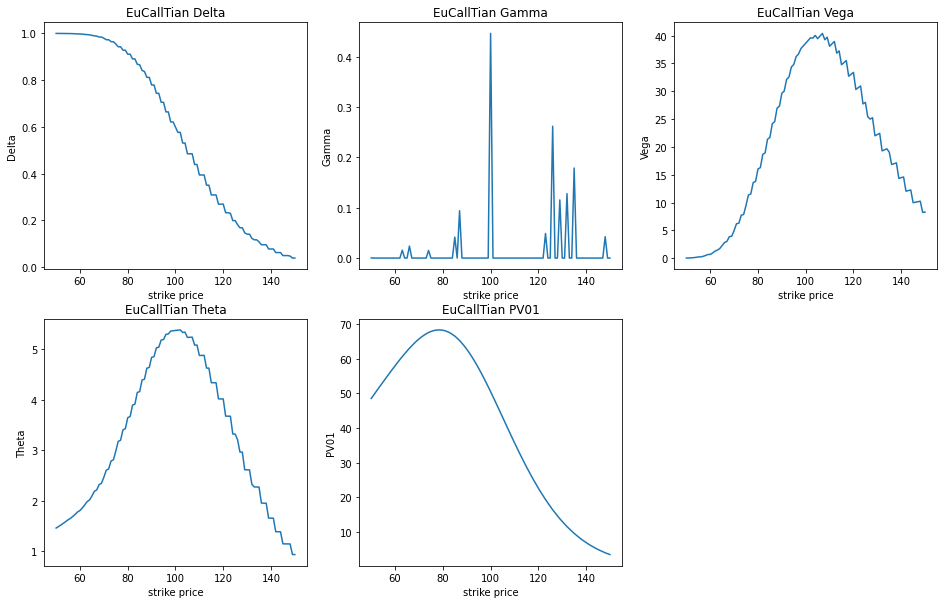

In [79]:
plt.rcParams['figure.figsize'] = (16.0,10.0)
plt.subplot(2, 3, 1)
plt.plot(strikeprice,GreekDeltaEuCallTian)
plt.title("EuCallTian Delta")
plt.xlabel("strike price")
plt.ylabel("Delta")
plt.subplot(2, 3, 2)
plt.plot(strikeprice,GreekGammaEuCallTian)
plt.title("EuCallTian Gamma")
plt.xlabel("strike price")
plt.ylabel("Gamma")
plt.subplot(2, 3, 3)
plt.plot(strikeprice,GreekVegaEuCallTian)
plt.title("EuCallTian Vega")
plt.xlabel("strike price")
plt.ylabel("Vega")
plt.subplot(2, 3, 4)
plt.plot(strikeprice,GreekThetaEuCallTian)
plt.title("EuCallTian Theta")
plt.xlabel("strike price")
plt.ylabel("Theta")
plt.subplot(2, 3, 5)
plt.plot(strikeprice,GreekRhoEuCallTian)
plt.title("EuCallTian PV01")
plt.xlabel("strike price")
plt.ylabel("PV01")

Text(0, 0.5, 'PV01')

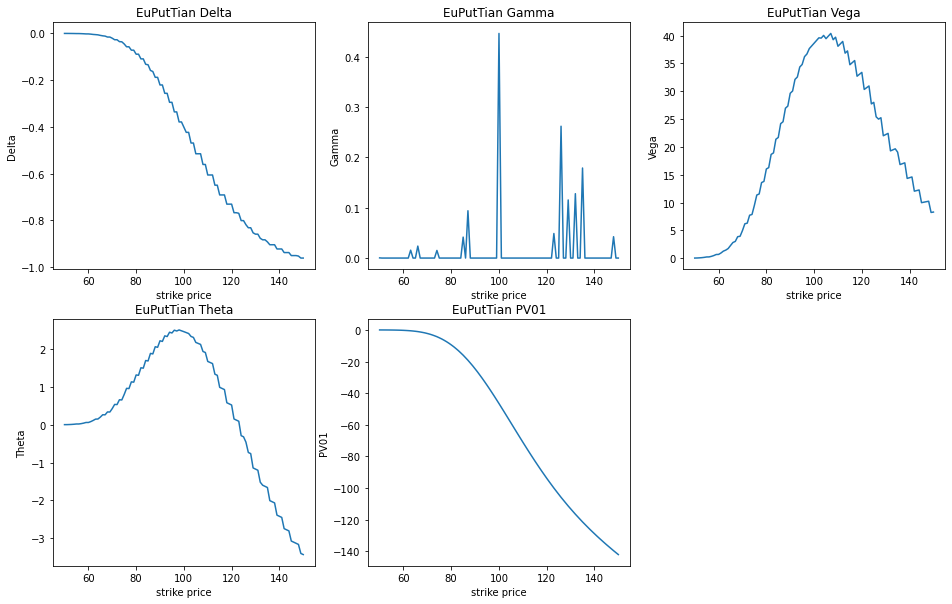

In [80]:
trade1=EuropeanOption(T, strikeprice, PayoffType.Put)
strike1=strike(tianCalib,trade1,n,EuropeanOption)

for i in strikeprice:
    trade1.strike=i
    strike1=strike(crrCalib,trade1,n,EuropeanOption)
    GreekDeltaEuPutTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Delta")
    GreekGammaEuPutTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Gamma")
    GreekVegaEuPutTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Vega")
    GreekThetaEuPutTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Theta")
    GreekRhoEuPutTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Rho")
    
plt.rcParams['figure.figsize'] = (16.0,10.0)
plt.subplot(2, 3, 1)
plt.plot(strikeprice,GreekDeltaEuPutTian)
plt.title("EuPutTian Delta")
plt.xlabel("strike price")
plt.ylabel("Delta")
plt.subplot(2, 3, 2)
plt.plot(strikeprice,GreekGammaEuPutTian)
plt.title("EuPutTian Gamma")
plt.xlabel("strike price")
plt.ylabel("Gamma")
plt.subplot(2, 3, 3)
plt.plot(strikeprice,GreekVegaEuPutTian)
plt.title("EuPutTian Vega")
plt.xlabel("strike price")
plt.ylabel("Vega")
plt.subplot(2, 3, 4)
plt.plot(strikeprice,GreekThetaEuPutTian)
plt.title("EuPutTian Theta")
plt.xlabel("strike price")
plt.ylabel("Theta")
plt.subplot(2, 3, 5)
plt.plot(strikeprice,GreekRhoEuPutTian)
plt.title("EuPutTian PV01")
plt.xlabel("strike price")
plt.ylabel("PV01")

Text(0, 0.5, 'PV01')

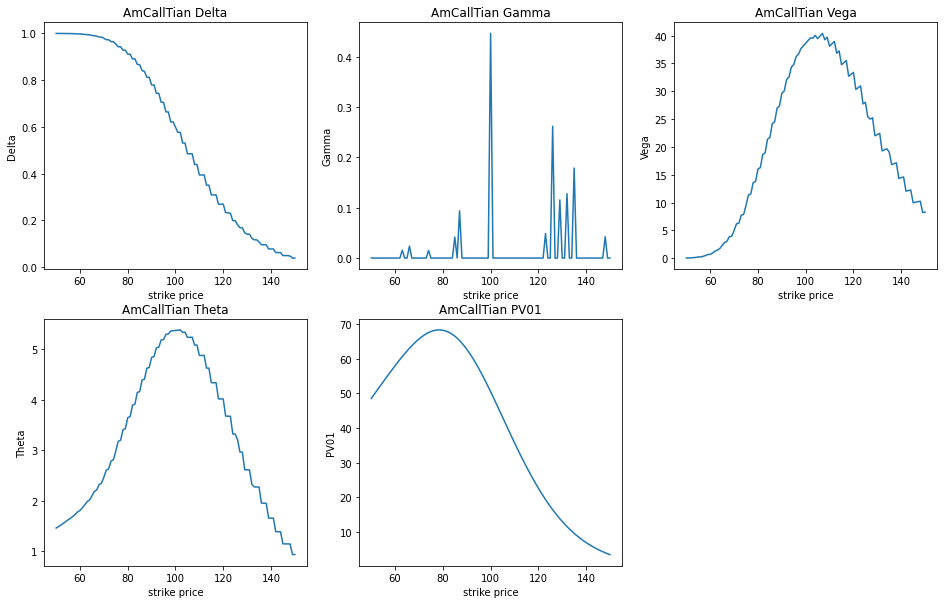

In [81]:
trade1=AmericanOption(T, strikeprice, PayoffType.Call)
strike1=strike(tianCalib,trade1,n,AmericanOption)


for i in strikeprice:
    trade1.strike=i
    strike1=strike(crrCalib,trade1,n,AmericanOption)
    GreekDeltaAmCallTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Delta")
    GreekGammaAmCallTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Gamma")
    GreekVegaAmCallTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Vega")
    GreekThetaAmCallTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Theta")
    GreekRhoAmCallTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Rho")

plt.rcParams['figure.figsize'] = (16.0,10.0)
plt.subplot(2, 3, 1)
plt.plot(strikeprice,GreekDeltaAmCallTian)
plt.title("AmCallTian Delta")
plt.xlabel("strike price")
plt.ylabel("Delta")
plt.subplot(2, 3, 2)
plt.plot(strikeprice,GreekGammaAmCallTian)
plt.title("AmCallTian Gamma")
plt.xlabel("strike price")
plt.ylabel("Gamma")
plt.subplot(2, 3, 3)
plt.plot(strikeprice,GreekVegaAmCallTian)
plt.title("AmCallTian Vega")
plt.xlabel("strike price")
plt.ylabel("Vega")
plt.subplot(2, 3, 4)
plt.plot(strikeprice,GreekThetaAmCallTian)
plt.title("AmCallTian Theta")
plt.xlabel("strike price")
plt.ylabel("Theta")
plt.subplot(2, 3, 5)
plt.plot(strikeprice,GreekRhoAmCallTian)
plt.title("AmCallTian PV01")
plt.xlabel("strike price")
plt.ylabel("PV01")

Text(0, 0.5, 'PV01')

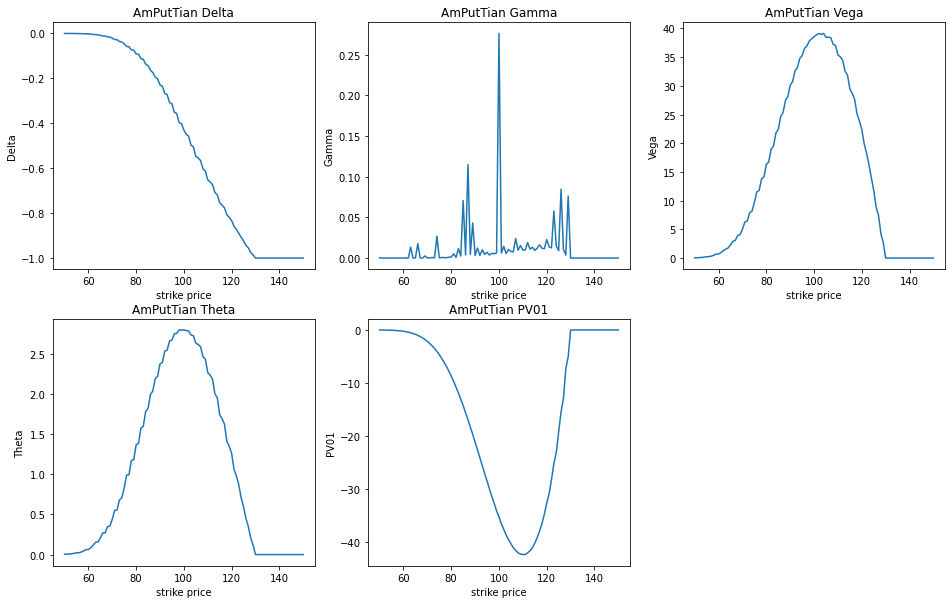

In [82]:
trade1=AmericanOption(T, strikeprice, PayoffType.Put)
strike1=strike(tianCalib,trade1,n,AmericanOption)


for i in strikeprice:
    trade1.strike=i
    strike1=strike(crrCalib,trade1,n,AmericanOption)
    GreekDeltaAmPutTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Delta")
    GreekGammaAmPutTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Gamma")
    GreekVegaAmPutTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Vega")
    GreekThetaAmPutTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Theta")
    GreekRhoAmPutTian[i-50]=binomialGreeks(S, r, vol, T, strike1,"Rho")

plt.rcParams['figure.figsize'] = (16.0,10.0)
plt.subplot(2, 3, 1)
plt.plot(strikeprice,GreekDeltaAmPutTian)
plt.title("AmPutTian Delta")
plt.xlabel("strike price")
plt.ylabel("Delta")
plt.subplot(2, 3, 2)
plt.plot(strikeprice,GreekGammaAmPutTian)
plt.title("AmPutTian Gamma")
plt.xlabel("strike price")
plt.ylabel("Gamma")
plt.subplot(2, 3, 3)
plt.plot(strikeprice,GreekVegaAmPutTian)
plt.title("AmPutTian Vega")
plt.xlabel("strike price")
plt.ylabel("Vega")
plt.subplot(2, 3, 4)
plt.plot(strikeprice,GreekThetaAmPutTian)
plt.title("AmPutTian Theta")
plt.xlabel("strike price")
plt.ylabel("Theta")
plt.subplot(2, 3, 5)
plt.plot(strikeprice,GreekRhoAmPutTian)
plt.title("AmPutTian PV01")
plt.xlabel("strike price")
plt.ylabel("PV01")